In [36]:
import pandas as pd
df=pd.read_stata("https://github.com/RMhanovernorwichschools/finalproject/blob/master/FF_wave6_2019.dta?raw=true")

In [37]:
#because the names are unclear, I'll use the codebook to rename columns
df.rename(columns={'idnum':'ID',
                   'cp6yloth':'liv_wth',
                   'cp6age':'cg_age',
                   'cp6adult':'num_fam_adults',
                   'cp6kids':'num_fam_kids',
                   'cp6pmarb':'biopar_marriedto_cg',
                   'cp6pmarp':'else_marriedto_cg',
                   'cp6hhinc':'hh_income',
                   'cp6hhsize':'num_fam_total',
                   'cp6povco':'poverty', #if >1, then above poverty line. if 0 or less, at or below pov line
                   'cp6edu':'cg_edu',
                   'cp6conf1':'cg_ID'}, 
                 inplace=True)
#Additionally, some information is more qualitative than numerical, and will be removed
df=df.drop(['cp6intmon', 'cp6tele', 'cp6intyr', 'cp6natsm', 'cp6samp', 'h6natwtx_rep1', 'h6natwtx_rep2',
       'h6natwtx_rep3', 'h6natwtx_rep4','h6natwtx_rep5', 'h6natwtx_rep6', 'h6natwtx_rep7', 'h6natwtx_rep8',
       'h6natwtx_rep9', 'h6natwtx_rep10', 'cp6pint', 'cp6source', 'cp6citsm', 'cp6ylpcg', 'cp6pcgrel',
       'cp6span', 'cp6yagey', 'cp6yagem', 'cp6mrelf', 'cp6prelb', 'cp6pcohb', 'cp6pcohp', 'cp6hhimp',
       'cp6povca', 'cp6w9intyr', 'cp6w9intmon', 'cp6drop', 'cp6conf2', 'cp6conf3'], axis=1)
#cg refers to "caregiver"
#biopar refers to biological parents
#hh means household

df=df[df.liv_wth!='-9 Not in wave']
df_baseline=df[['ID', 'num_fam_adults', 'num_fam_kids']]

schoolqs=['p6c'+str(x+9) for x in range(18)]
df_school=df[schoolqs]

pconfqs=['p6g'+str(x+7) for x in range(20)]
df_pconf=df[pconfqs]

homeqs=['p6d' + str(x+1) for x in range(17)]
df_homeenv=df[homeqs]

psychqs=['p6b' + str(x+35) for x in range(36)]
df_psych=df[psychqs]

df_comps=pd.concat([df_baseline, df_homeenv, df_pconf, df_psych, df_school], axis=1)
features = list(df_comps.keys())
features.remove('ID')

for x in features:
    mode=df_comps[x].mode()
    if (mode=='-6 Skip').bool() or (mode=='-3 Missing').bool():
        df_comps = df_comps.drop([x], axis=1)

In [38]:
for x in df_comps.keys():
    df_comps=df_comps[df_comps[x]!='-3 Missing']
    df_comps=df_comps[df_comps[x]!='-6 Skip']
    df_comps=df_comps[df_comps[x]!='-2 Don\'t know']
    df_comps=df_comps[df_comps[x]!='-1 Refuse']

In [39]:
df_comps

,ID,num_fam_adults,num_fam_kids,p6d1,p6d2,p6d3,p6d4,p6d5,p6d6,p6d7,...,p6c14,p6c15,p6c16,p6c17,p6c18,p6c19,p6c20,p6c21,p6c23,p6c25
1,0002,3,4,3 Often,3 Often,3 Often,1 Never,3 Often,5,1 Yes,...,2 No,1 Yes,2 No,2 No,2 No,2 No,1 Yes,2 No,2 No,2 No
3,0004,2,2,2 Sometimes,3 Often,3 Often,2 Sometimes,3 Often,2,2 No,...,2 No,2 No,2 No,2 No,2 No,2 No,2 No,2 No,2 No,2 No
4,0005,2,2,2 Sometimes,3 Often,2 Sometimes,1 Never,1 Never,4,1 Yes,...,2 No,2 No,2 No,2 No,2 No,2 No,2 No,2 No,1 Yes,2 No
10,0011,2,5,2 Sometimes,3 Often,3 Often,2 Sometimes,2 Sometimes,5,1 Yes,...,2 No,2 No,2 No,2 No,2 No,2 No,2 No,2 No,2 No,2 No
11,0012,2,4,3 Often,3 Often,2 Sometimes,3 Often,3 Often,4,2 No,...,2 No,2 No,2 No,2 No,2 No,2 No,2 No,1 Yes,2 No,2 No
12,0013,2,3,2 Sometimes,3 Often,2 Sometimes,2 Sometimes,2 Sometimes,3,1 Yes,...,2 No,2 No,2 No,2 No,2 No,2 No,2 No,2 No,2 No,2 No
15,0016,2,2,2 Sometimes,3 Often,3 Often,2 Sometimes,3 Often,5,1 Yes,...,2 No,2 No,2 No,2 No,2 No,2 No,2 No,2 No,2 No,2 No
17,0018,2,3,1 Never,3 Often,3 Often,3 Often,3 Often,5,1 Yes,...,1 Yes,2 No,2 No,2 No,2 No,2 No,2 No,1 Yes,1 Yes,2 No
18,0019,2,5,2 Sometimes,3 Often,2 Sometimes,3 Often,3 Often,2,2 No,...,2 No,2 No,2 No,2 No,2 No,2 No,2 No,1 Yes,2 No,2 No
20,0021,4,1,3 Often,3 Often,3 Often,2 Sometimes,3 Often,3,2 No,...,2 No,2 No,2 No,2 No,2 No,1 Yes,2 No,2 No,2 No,2 No


In [40]:
print (df_comps.keys())

Index(['ID', 'num_fam_adults', 'num_fam_kids', 'p6d1', 'p6d2', 'p6d3', 'p6d4',
       'p6d5', 'p6d6', 'p6d7', 'p6d8', 'p6d9', 'p6d10', 'p6d11', 'p6d12',
       'p6d13', 'p6d14', 'p6d15', 'p6d16', 'p6d17', 'p6g7', 'p6g8', 'p6g9',
       'p6g11', 'p6g12', 'p6g17', 'p6g18', 'p6b35', 'p6b36', 'p6b37', 'p6b38',
       'p6b39', 'p6b40', 'p6b41', 'p6b42', 'p6b43', 'p6b44', 'p6b45', 'p6b46',
       'p6b47', 'p6b48', 'p6b49', 'p6b50', 'p6b51', 'p6b52', 'p6b53', 'p6b54',
       'p6b55', 'p6b56', 'p6b57', 'p6b58', 'p6b59', 'p6b60', 'p6b61', 'p6b62',
       'p6b63', 'p6b64', 'p6b65', 'p6b66', 'p6b67', 'p6b68', 'p6b69', 'p6b70',
       'p6c9', 'p6c10', 'p6c11', 'p6c12', 'p6c13', 'p6c14', 'p6c15', 'p6c16',
       'p6c17', 'p6c18', 'p6c19', 'p6c20', 'p6c21', 'p6c23', 'p6c25'],
      dtype='object')


In [41]:
for x in ['num_fam_adults', 'num_fam_kids', 'p6d6']:
    df_comps[x]=df_comps[x].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40], [0.0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40])

reps=list(df_comps.keys())
for c in ['ID', 'num_fam_adults', 'num_fam_kids', 'p6d6']:
    reps.remove(c)
    
for x in reps:
    new=[]
    for b in df_comps['ID']:
        num=int(b)-1
        a=df_comps[x][num]
        if a=='1 Never' or a=='2 No' or a=='1 Not true' or a=='3 Not done this' or a=='4 Very unlikely':
            new.append(0.0)
        elif a=='2 Sometimes' or a=='2 Sometimes true' or a=="1 Done this once" or a=='2 Somewhat likely':
            new.append(0.5)
        elif a=='3 Often' or a=='1 Yes' or a=='3 Often true' or a=='2 Done this more than once' or a=='1 Very likely':
            new.append(1.0)
        elif a=='3 Not very likely':
            new.append(0.25)
        else:
            print(a)
    df_comps[x+'_int']= new
    df_comps = df_comps.drop([x], axis=1)

In [85]:
for x in reps:
    for y in reps:
        if abs(df_comps[x+'_int'].corr(df_comps[y+'_int']))>0.6 and x!=y:
            print(x+' and '+y+' are corr by '+str(df_comps[x+'_int'].corr(df_comps[y+'_int'])))
for x in ['num_fam_adults','num_fam_kids', 'ka_ratio']:
    for y in reps:
        if abs(df_comps[x].corr(df_comps[y+'_int']))>0.25 and x[2]!=y[2]:
            print(x+' and '+y+' are corr by '+str(df_comps[x].corr(df_comps[y+'_int'])))

p6b46 and p6b47 are corr by 0.6128158567797732
p6b47 and p6b46 are corr by 0.6128158567797733
p6c16 and p6c17 are corr by 0.6811491856137438
p6c17 and p6c16 are corr by 0.6811491856137437
num_fam_kids and p6d14 are corr by 0.2835881317308557
num_fam_kids and p6d17 are corr by -0.25178650589706625


In [84]:
df_comps['ka_ratio']=df_comps.num_fam_adults/df_comps.num_fam_kids

### Chosen variables based on corrs
- p6b39
- p6c21 (these two are most imp.)
- num_fam_kids (with p6d14 to make simple illustration and to majors) (also interesting to comp to ka_ratio)
- p6b38 (home alternate to 39)
- p6b41
- p6b42
- p6b50
- other p6bs

### Strongest Corrs to Illustrate
- p6c16 to p6c17
- p6b46 to p6b47

(array([1461.,    0.,    0.,    0.,    0.,  335.,    0.,    0.,    0.,
          42.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

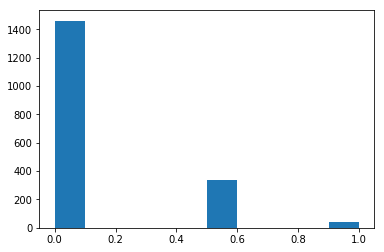

In [97]:
import matplotlib.pyplot as plt
plt.hist(df_comps.p6b39_int)

In [95]:
def corr (x, y):
    print(x+' and '+y+' are corr by '+str(df_comps[x+'_int'].corr(df_comps[y+'_int'])))